In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [ ]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset1/known_images'))

717

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset1/known_images')

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

715


In [ ]:
image_count2 = len(list(data_dir.glob('normal/*')))
print(image_count2)

364


In [ ]:
# data3_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset1/known_images/normal_0.png')

# data3_dir.head()

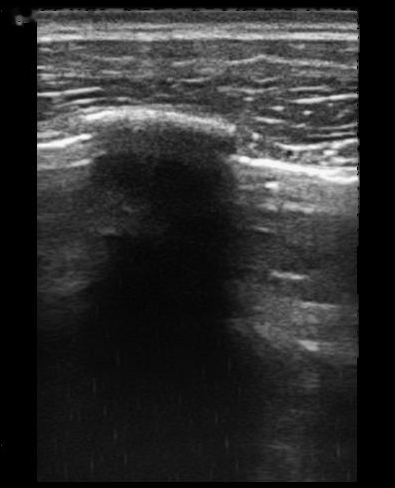

In [ ]:
normal = list(data_dir.glob('normal/*'))
PIL.Image.open(str(normal[363]))

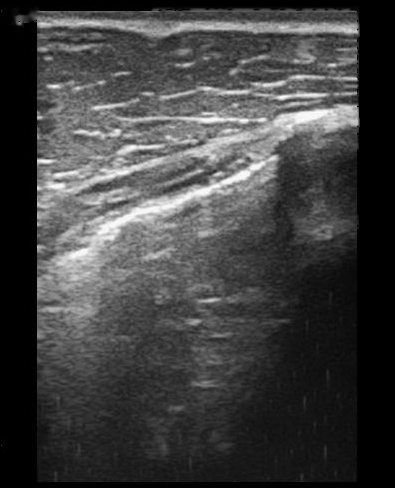

In [ ]:
PIL.Image.open(str(normal[1]))

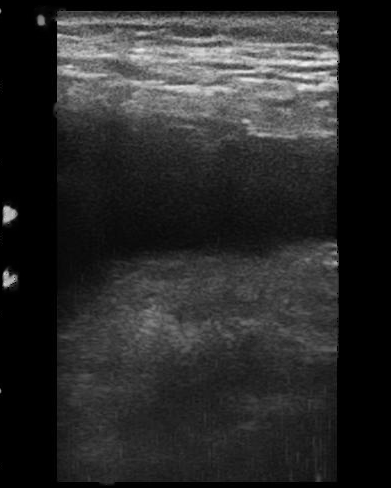

In [ ]:
sick = list(data_dir.glob('sick/*'))
PIL.Image.open(str(sick[0]))

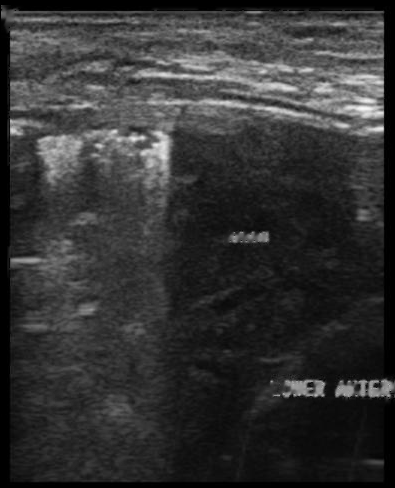

In [ ]:
PIL.Image.open(str(sick[1]))

In [ ]:
batch_size = 256
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


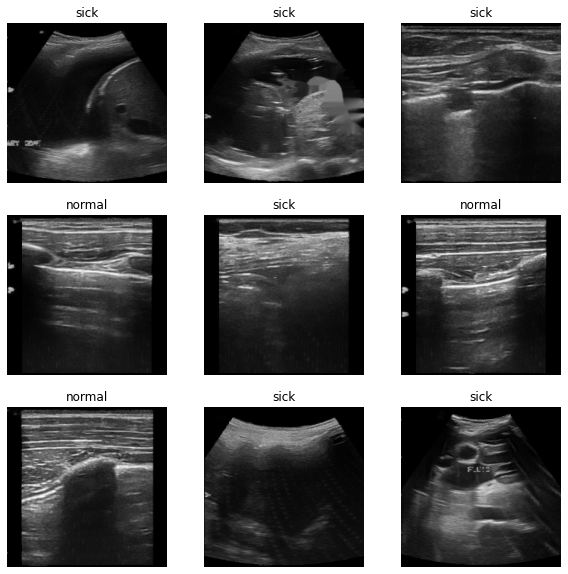

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(256, 224, 224, 3)
(256,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(250).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9809387


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 64)      

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
3/3 [==============================] - 2s 436ms/step - loss: 1.0519 - accuracy: 0.4510 - val_loss: 0.5989 - val_accuracy: 0.4895
Epoch 2/30
3/3 [==============================] - 1s 169ms/step - loss: 0.5211 - accuracy: 0.6783 - val_loss: 0.4413 - val_accuracy: 0.7902
Epoch 3/30
3/3 [==============================] - 1s 170ms/step - loss: 0.4281 - accuracy: 0.8007 - val_loss: 0.4041 - val_accuracy: 0.8881
Epoch 4/30
3/3 [==============================] - 1s 245ms/step - loss: 0.3119 - accuracy: 0.9056 - val_loss: 0.2705 - val_accuracy: 0.8671
Epoch 5/30
3/3 [==============================] - 1s 168ms/step - loss: 0.2614 - accuracy: 0.8759 - val_loss: 0.2659 - val_accuracy: 0.9231
Epoch 6/30
3/3 [==============================] - 1s 167ms/step - loss: 0.2381 - accuracy: 0.8899 - val_loss: 0.1870 - val_accuracy: 0.9091
Epoch 7/30
3/3 [==============================] - 1s 168ms/step - loss: 0.1614 - accuracy: 0.9388 - val_loss: 0.1759 - val_accuracy: 0.9510
Epoch 8/30
3/3 [====

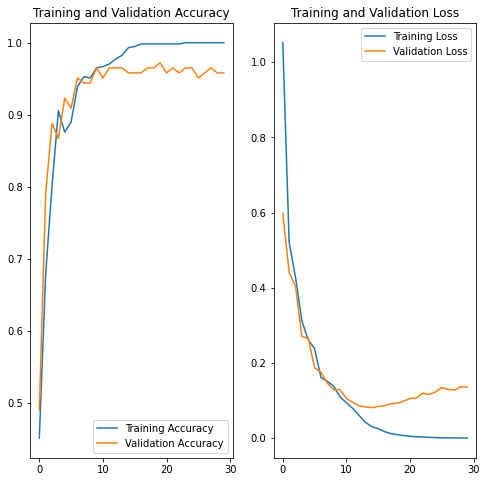

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

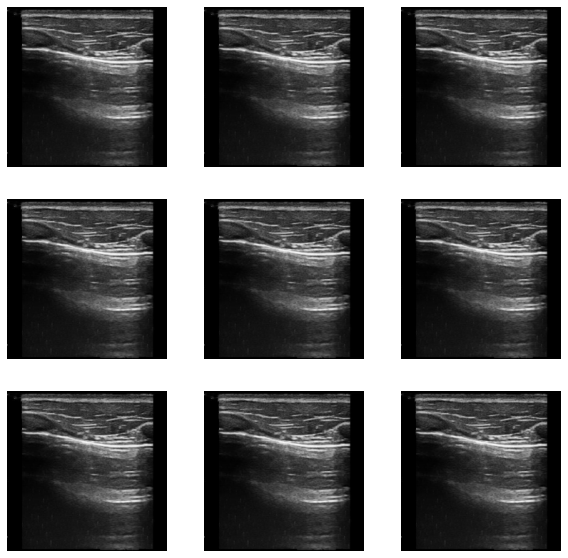

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
3/3 [==============================] - 2s 246ms/step - loss: 1.0617 - accuracy: 0.5017 - val_loss: 0.7819 - val_accuracy: 0.4825
Epoch 2/30
3/3 [==============================] - 1s 270ms/step - loss: 0.6354 - accuracy: 0.6608 - val_loss: 0.5448 - val_accuracy: 0.7273
Epoch 3/30
3/3 [==============================] - 1s 264ms/step - loss: 0.5682 - accuracy: 0.6661 - val_loss: 0.5008 - val_accuracy: 0.7343
Epoch 4/30
3/3 [==============================] - 1s 181ms/step - loss: 0.5010 - accuracy: 0.7570 - val_loss: 0.3895 - val_accuracy: 0.8671
Epoch 5/30
3/3 [==============================] - 1s 182ms/step - loss: 0.4423 - accuracy: 0.7920 - val_loss: 0.3050 - val_accuracy: 0.8741
Epoch 6/30
3/3 [==============================] - 1s 181ms/step - loss: 0.3594 - accuracy: 0.8339 - val_loss: 0.2735 - val_accuracy: 0.8741
Epoch 7/30
3/3 [==============================] - 1s 264ms/step - loss: 0.3377 - accuracy: 0.8304 - val_loss: 0.2758 - val_accuracy: 0.8741
Epoch 8/30
3/3 [====

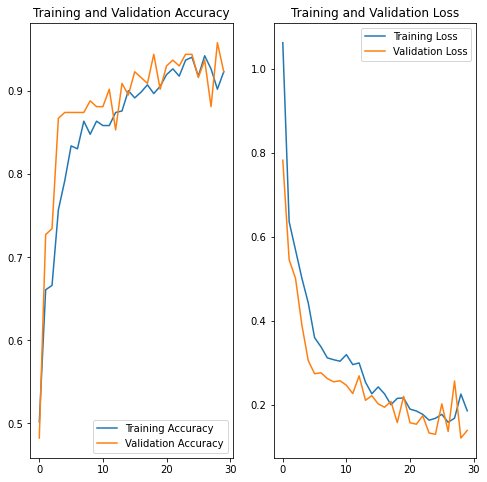

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset1/unknown_images')

data2_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset2/images/sick_eff29.png')

#data2_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset2/images/sick_eff0.png')

# data2_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/deep_learning_project/dataset1/known_images/sick_189.png')


img = tf.keras.utils.load_img(
    data2_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to the class for {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to the class for normal with a 82.78 percent confidence.
